In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data in python
data= pd.read_csv('C:/Users/Stevelal/Downloads/Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
# Checking for null values
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There is no null value present in the data

In [4]:
# Checking basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
# Checking the statistical descriptions of the data
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


array([[<AxesSubplot:title={'center':'Add1(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add2(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add3(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add4(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add5(in Thousands)'}>,
        <AxesSubplot:title={'center':'Profit(in Thousands)'}>]],
      dtype=object)

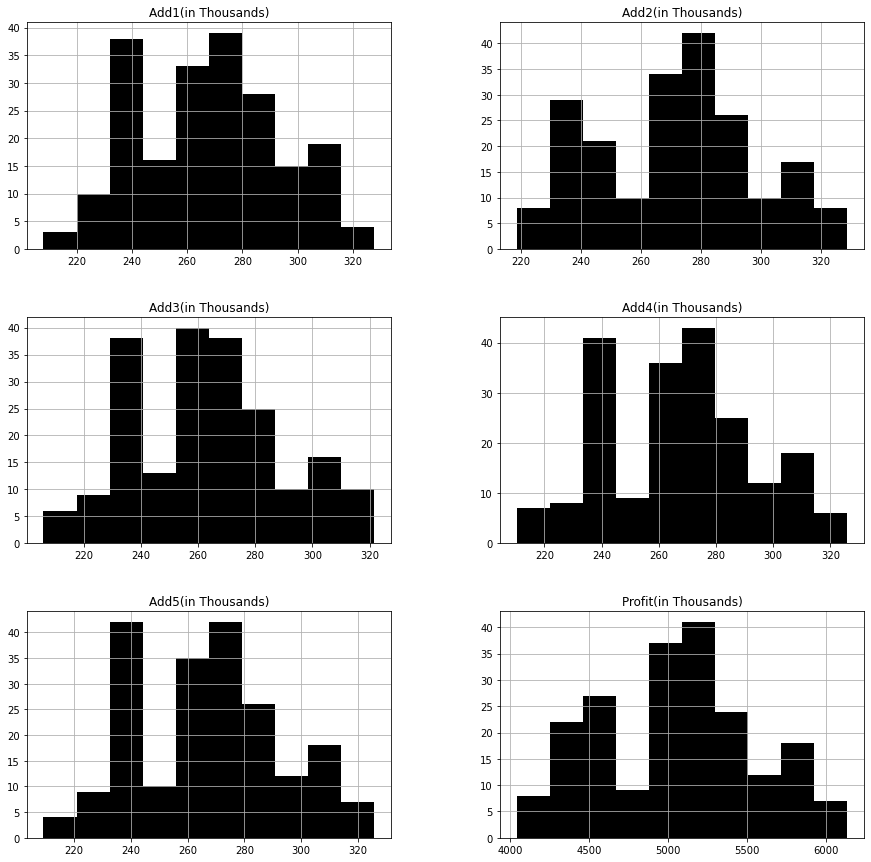

In [6]:
# Plotting the data to see the distribution
data.hist(figsize=(15,15), color= 'black')

<AxesSubplot:>

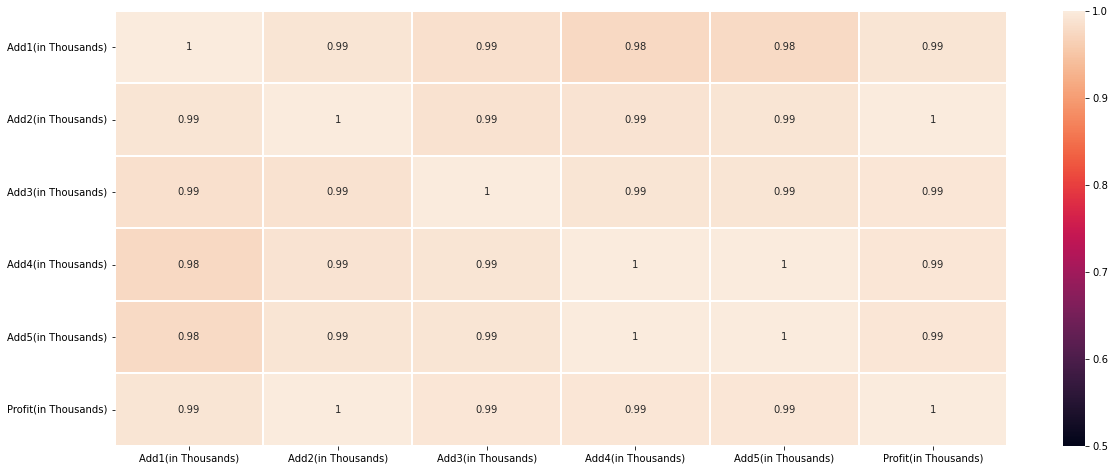

In [7]:
# Question 1. Checking the relationship between the variables using correlation 
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.5, vmax=1, annot= True, linewidth= 0.2)

From the correlation matrix we can understand that the variables are highly correlated among themselves and has a great influence in determining the profit margins

In [8]:
# Question 2. Building a regression model
# Taking profit as dependent variable y and ad amount by different channels as x values or the independent variable
y= data['Profit(in Thousands)']
x= data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]


In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 42,test_size= 0.25)

In [10]:
lr= linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

In [11]:
# Checking the Mean Squared Error

predictions= model.predict(x_test)
print('MSE is: %0.3f'% mean_squared_error(y_test, predictions))

MSE is: 0.000


The mean of the squared errors are 0 those the model can be said as best fit

In [16]:
print('The intercept value of the model is %0.3f'% model.intercept_)

The intercept value of the model is 0.000


In [23]:
print('The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands),Add5(in Thousands) is as follows: \n',model.coef_)

The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands),Add5(in Thousands) is as follows: 
 [ 1.   12.38  3.5   1.    0.9 ]


The coefficient of the add2 is the highest among the others. It says that around 12 times profit margin increases with spending on the 2nd ad channel. 

In [14]:
# Checking the r square value
lr.score(x_test, y_test)

1.0

In [15]:
# Question 3. predicting the profit based on the given data
new_data= np.array([[290, 312, 309, 298, 320]])
lr.predict(new_data)

array([5820.06])

The profit of the company based on the new spending portfolio would be 5820.06